# Import Libraries and LOWESS Utils

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from moepy import lowess

# TODO: look up how to reference the csv given bus values for V and I as well as SOH from model for predicting SOC

# Read Data

In [56]:
data = pd.read_csv('../res/model_data/batemo_model_data.csv')
data = data[data.V >= 2.5]

# Train LOWESS Model

In [44]:
min_SOH, max_SOH = data.SOH.min(), data.SOH.max()
min_I, max_I = int(data.I.min()), int(data.I.max())

# Initialize lists to store results
V_acc = []
I_acc = []
SOH_acc = []
SOC_pred = []

for i in range(min_SOH, max_SOH + 1):
    for j in range(min_I, max_I + 1):
        if j == 0:
            # Skip 0 A Current
            continue
        print(i, j)
        data_ij = data[(data.SOH == i) & (data.I == j)]
        V = np.array(data_ij.V)
        SOC = np.array(data_ij.SOC)
        lowess_model = lowess.Lowess()
        lowess_model.fit(V, SOC, frac=0.1, num_fits=500)
        y_pred = lowess_model.predict(V)
        
        # Append results to lists
        I_acc.extend([j] * len(y_pred))
        V_acc.extend(V)
        SOH_acc.extend([i] * len(y_pred))
        SOC_pred.extend(y_pred)

# Export the results to a new CSV
results = pd.DataFrame({'V': V_acc, 'I': I_acc, 'SOH': SOH_acc, 'SOC': SOC_pred})
results.to_csv('../res/model_data/lowess_results.csv', index=False)

70 -55
70 -54
70 -53
70 -52
70 -51
70 -50
70 -49
70 -48
70 -47
70 -46
70 -45
70 -44
70 -43
70 -42
70 -41
70 -40
70 -39
70 -38
70 -37
70 -36
70 -35
70 -34
70 -33
70 -32
70 -31
70 -30
70 -29
70 -28
70 -27
70 -26
70 -25
70 -24
70 -23
70 -22
70 -21
70 -20
70 -19
70 -18
70 -17
70 -16
70 -15
70 -14
70 -13
70 -12
70 -11
70 -10
70 -9
70 -8
70 -7
70 -6
70 -5
70 -4
70 -3
70 -2
70 -1
70 1
70 2
70 3
70 4
70 5
70 6
70 7
70 8
70 9
70 10
70 11
70 12
70 13
70 14
70 15
70 16
70 17
70 18
70 19
70 20
70 21
70 22
70 23
70 24
70 25
70 26
70 27
70 28
70 29
70 30
70 31
70 32
70 33
70 34
70 35
70 36
70 37
70 38
70 39
70 40
70 41
70 42
70 43
70 44
70 45
70 46
70 47
70 48
70 49
70 50
70 51
70 52
70 53
70 54
70 55
71 -55
71 -54
71 -53
71 -52
71 -51
71 -50
71 -49
71 -48
71 -47
71 -46
71 -45
71 -44
71 -43
71 -42
71 -41
71 -40
71 -39
71 -38
71 -37
71 -36
71 -35
71 -34
71 -33
71 -32
71 -31
71 -30
71 -29
71 -28
71 -27
71 -26
71 -25
71 -24
71 -23
71 -22
71 -21
71 -20
71 -19
71 -18
71 -17
71 -16
71 -15
71 -14
71 -13
71

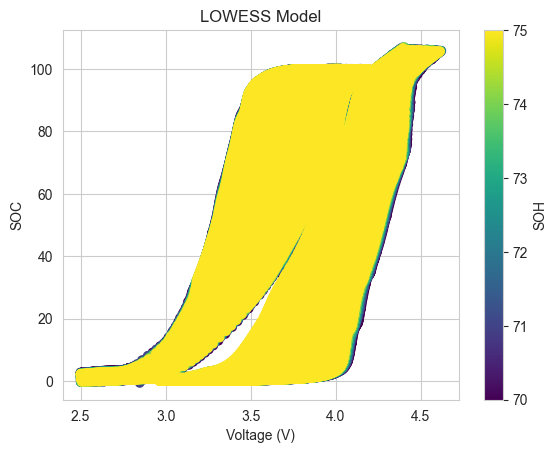

In [54]:
# Filter the results to only include SOH from 70-75
results = pd.read_csv('../res/model_data/lowess_results.csv')
results = results[(results.SOH >= 70) & (results.SOH <= 75)]

# Plot the results and color by SOH
plt.scatter(results.V, results.SOC, c=results.SOH, cmap='viridis')
plt.xlabel('Voltage (V)')
plt.ylabel('SOC')
plt.title('LOWESS Model')
plt.colorbar(label='SOH')
plt.show()

In [79]:
# sample code for compressing the csv and prepping it to be flashed onto the microcontroller:
# Read CSV data
data = pd.read_csv('../res/model_data/lowess_results.csv')

# Filter Data for I >= -55 and I <= 14 --> Bounds of Realistic Currents
data = data[(data.I >= -55) & (data.I <= 14)]

# Round V and SOC to 3 decimal places
data.V = data.V.round(3)
data.SOC = data.SOC.round(3)

# Convert numerical data to smaller data types
data.V = data.V.astype(np.float16)
data.I = data.I.astype(np.int8)
data.SOH = data.SOH.astype(np.int8)
data.SOC = data.SOC.astype(np.float16)

# Read compressed data from file
data.to_csv('../res/model_data/compressed_lowess_results.bin', index=False, compression='xz')

In [81]:
# devompress the data and check if it is the same as the original data
data = pd.read_csv('../res/model_data/compressed_lowess_results.bin', compression='xz')
data.to_csv('../res/model_data/lowess_results.csv', index=False)